In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.optimizers import Adam
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard

In [3]:
train_dir = 'dataset_dogs_vs_cats/train'
test_dir = 'dataset_dogs_vs_cats/test'

datagen = ImageDataGenerator(rescale=1./255)

# Load the training images without augmentation
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

# Load the test images
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [4]:
def log_results(model, history):
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

    training_loss = history.history['loss'][-1]
    training_accuracy = history.history['accuracy'][-1]

    return {
        "training_loss": training_loss,
        "training_accuracy": training_accuracy,
        "test_accuracy": test_accuracy,
        "num_parameters": model.count_params()
    }

In [5]:
def summarize_diagnostics(history):

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

VGG - 1 Block

In [6]:
def vgg_1block():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model_1 = vgg_1block()
history_1 = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_1 = log_results(model_1, history_1)
print(f"Model 1 Results: {results_1}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5276 - loss: 3.6437 - val_accuracy: 0.5128 - val_loss: 0.8813
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4531 - loss: 1.2678 - val_accuracy: 0.5128 - val_loss: 0.8601
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5419 - loss: 0.7441 - val_accuracy: 0.5128 - val_loss: 0.7281
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5469 - loss: 0.6324 - val_accuracy: 0.5385 - val_loss: 0.6699
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7737 - loss: 0.5600 - val_accuracy: 0.5641 - val_loss: 0.7565
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6785 - loss: 0.5460 - val_accuracy: 0.4872 - val_loss: 0.7047
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8526 - loss: 0.4490 - val_accuracy: 0.5641 - val_loss: 0.7322
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8714 - loss: 0.3322 - val_accuracy: 0.5128 - val_loss: 0.8350
Epoch 9/10
3/3 

In [8]:
log_results(model_1, history_1)

{'training_loss': 0.2061174362897873,
 'training_accuracy': 0.9312499761581421,
 'test_accuracy': 0.5641025900840759,
 'num_parameters': 10636481}

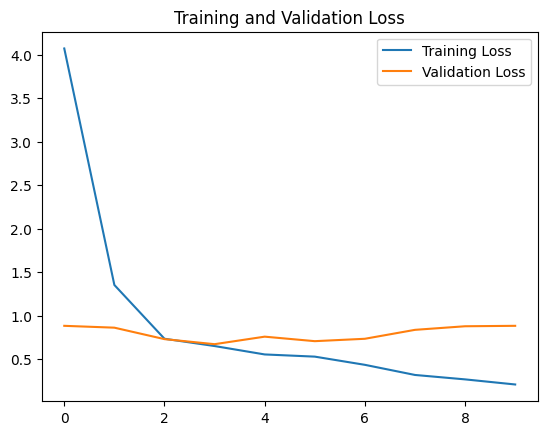

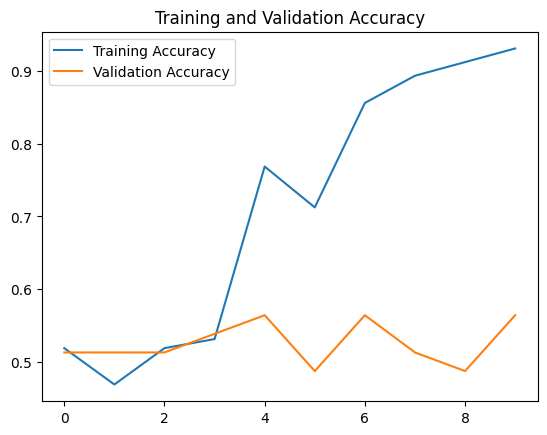

In [9]:
summarize_diagnostics(history_1)

VGG - 3 blocks

In [10]:
def vgg_3blocks():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model_2 = vgg_3blocks()
history_2 = model_2.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_2 = log_results(model_2, history_2)
print(f"Model 2 Results: {results_2}")

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.4388 - loss: 1.1739 - val_accuracy: 0.4872 - val_loss: 0.7427
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5078 - loss: 0.7035 - val_accuracy: 0.4872 - val_loss: 0.6908
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5339 - loss: 0.6763 - val_accuracy: 0.7179 - val_loss: 0.6790
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7508 - loss: 0.6633 - val_accuracy: 0.5128 - val_loss: 0.6943
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.5599 - loss: 0.6799 - val_accuracy: 0.4872 - val_loss: 0.6943
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5598 - loss: 0.6771 - val_accuracy: 0.6923 - val_loss: 0.6622
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6707 - loss: 0.6132 - val_accuracy: 0.5128 - val_loss: 0.7236
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5057 - loss: 0.6715 - val_accuracy: 0.6154 - val_loss: 0.6518
Epoch 9/10
3/3 

In [12]:
log_results(model_2, history_2)

{'training_loss': 0.5315864086151123,
 'training_accuracy': 0.7562500238418579,
 'test_accuracy': 0.7179487347602844,
 'num_parameters': 4828481}

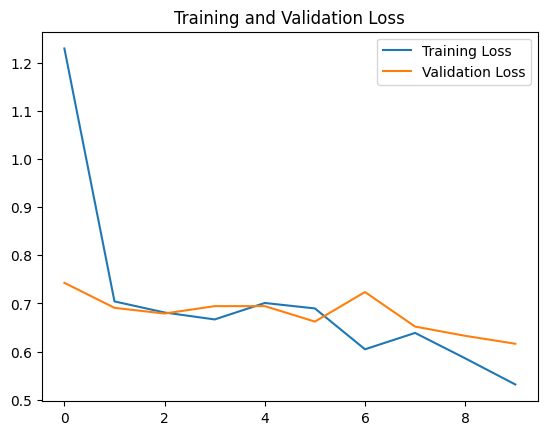

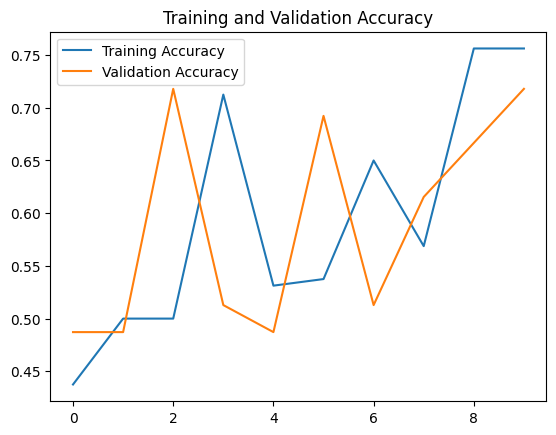

In [13]:
summarize_diagnostics(history_2)

VGG - 3 blocks with data augmentation

In [14]:
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_aug = aug_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [15]:
model_3 = vgg_3blocks()
history_3 = model_3.fit(
    train_generator_aug,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_3 = log_results(model_3, history_3)
print(f"Model 3 Results: {results_3}")

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5250 - loss: 0.8592 - val_accuracy: 0.5128 - val_loss: 0.7151
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5141 - loss: 0.7659 - val_accuracy: 0.4872 - val_loss: 0.7620
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5406 - loss: 0.7037 - val_accuracy: 0.5128 - val_loss: 0.7118
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5081 - loss: 0.7177 - val_accuracy: 0.4872 - val_loss: 0.6879
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5379 - loss: 0.6793 - val_accuracy: 0.5128 - val_loss: 0.7071
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5395 - loss: 0.6854 - val_accuracy: 0.5641 - val_loss: 0.6721
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6211 - loss: 0.6432 - val_accuracy: 0.4872 - val_loss: 0.7250
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7109 - loss: 0.6123 - val_accuracy: 0.5128 - val_loss: 0.7744
Epoch 9/10
3/3 ━

In [16]:
log_results(model_3, history_3)

{'training_loss': 0.6272440552711487,
 'training_accuracy': 0.668749988079071,
 'test_accuracy': 0.4871794879436493,
 'num_parameters': 4828481}

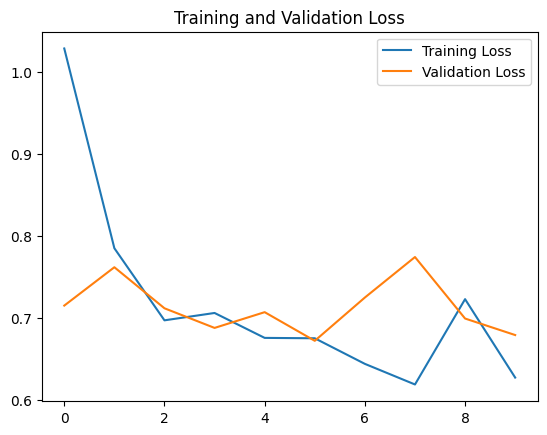

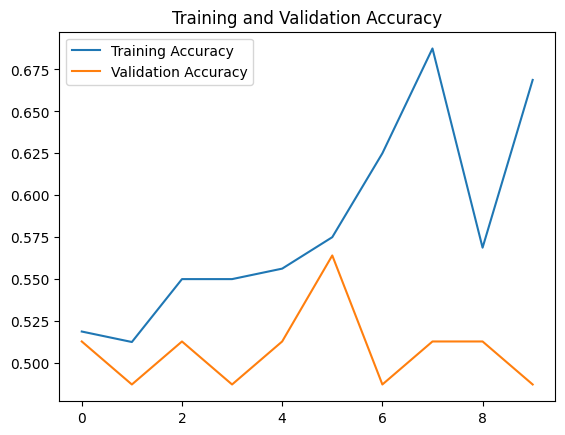

In [17]:
summarize_diagnostics(history_3)

Transfer Learning using VGG16/VGG19 with Fine-tuning All Layer

In [18]:
def transfer_learning_full_finetune():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = True

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model_4 = transfer_learning_full_finetune()
history_4 = model_4.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_4 = log_results(model_4, history_4)
print(f"Model 4 Results: {results_4}")

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 13s/step - accuracy: 0.5914 - loss: 0.6709 - val_accuracy: 0.5385 - val_loss: 0.6891
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 19s/step - accuracy: 0.8302 - loss: 0.4900 - val_accuracy: 0.5897 - val_loss: 0.6263
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - accuracy: 0.9137 - loss: 0.3771 - val_accuracy: 0.6667 - val_loss: 0.5598
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 16s/step - accuracy: 0.9583 - loss: 0.2752 - val_accuracy: 0.7692 - val_loss: 0.5053
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 18s/step - accuracy: 0.9672 - loss: 0.1913 - val_accuracy: 0.8205 - val_loss: 0.4702
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 14s/step - accuracy: 0.9885 - loss: 0.1171 - val_accuracy: 0.8205 - val_loss: 0.4368
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 11s/step - accuracy: 0.9943 - loss: 0.0822 - val_accuracy: 0.8205 - val_loss: 0.4254
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 11s/step - accuracy: 1.0000 - loss: 0.0516 - val_accuracy: 0.8205 - val_loss: 0.4273


In [20]:
log_results(model_4, history_4)

{'training_loss': 0.017176514491438866,
 'training_accuracy': 1.0,
 'test_accuracy': 0.8461538553237915,
 'num_parameters': 15763521}

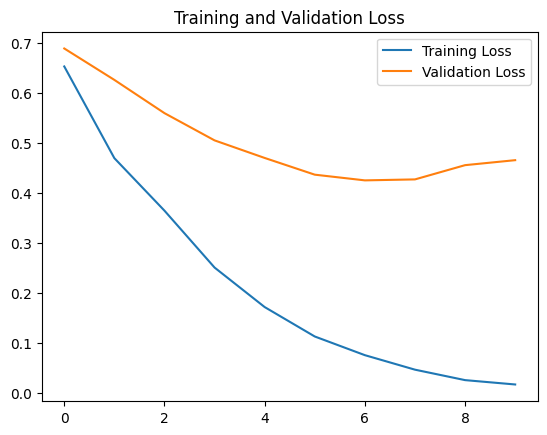

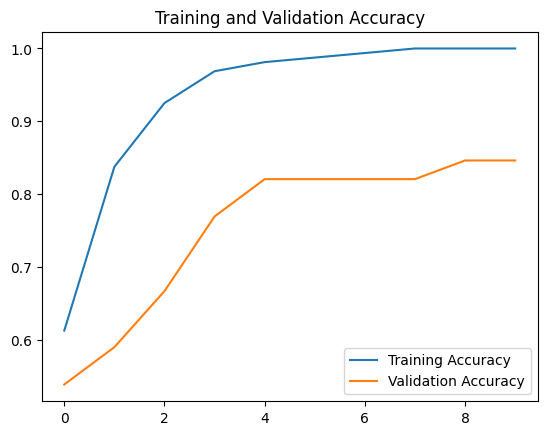

In [21]:
summarize_diagnostics(history_4)

### Transfer Learning using VGG16/VGG19 with Fine-tuning Only Final MLP Layers

In [22]:
def transfer_learning_finetune_fc():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Freeze convolutional layers

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [23]:
model_5 = transfer_learning_finetune_fc()
history_5 = model_5.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_5 = log_results(model_5, history_5)
print(f"Model 5 Results: {results_5}")

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.5477 - loss: 0.6998 - val_accuracy: 0.5641 - val_loss: 0.6849
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5516 - loss: 0.7073 - val_accuracy: 0.6154 - val_loss: 0.6611
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5893 - loss: 0.6526 - val_accuracy: 0.6410 - val_loss: 0.6460
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.6078 - loss: 0.6285 - val_accuracy: 0.6923 - val_loss: 0.6348
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6354 - loss: 0.6070 - val_accuracy: 0.7436 - val_loss: 0.6260
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6786 - loss: 0.6021 - val_accuracy: 0.7692 - val_loss: 0.6187
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6982 - loss: 0.5805 - val_accuracy: 0.7692 - val_loss: 0.6115
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7388 - loss: 0.5545 - val_accuracy: 0.7692 - val_loss: 0.6046
Epoch 9/

In [24]:
log_results(model_5, history_5)

{'training_loss': 0.529378354549408,
 'training_accuracy': 0.8125,
 'test_accuracy': 0.7435897588729858,
 'num_parameters': 15763521}

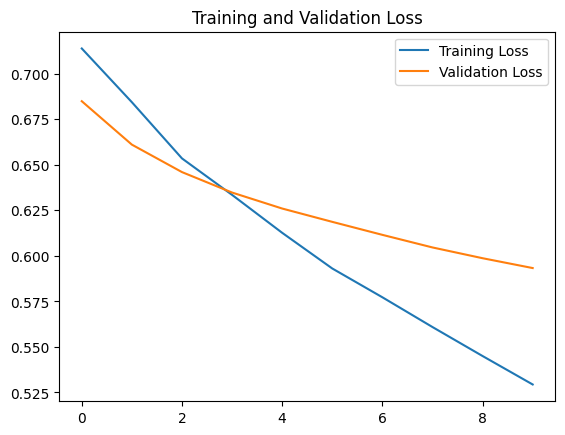

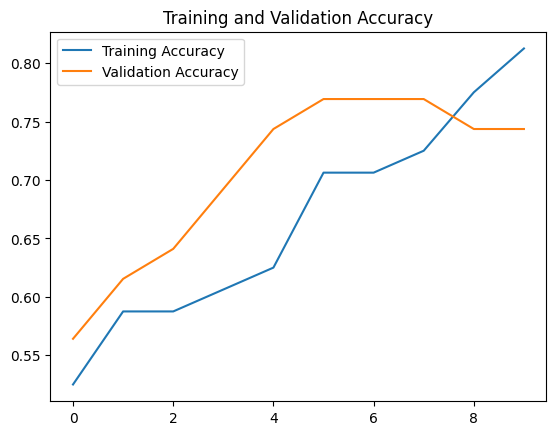

In [25]:
summarize_diagnostics(history_5)

## Tensorboard

In [26]:
from torch.utils.tensorboard import SummaryWriter

In [27]:
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.BinaryAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.BinaryAccuracy('test_accuracy')

In [28]:
def loss_object(y_train, predictions):
    return tf.reduce_mean(tf.square(y_train - predictions))


In [29]:
def train_step(model, optimizer, x_train, y_train):
  y_train=y_train.reshape(-1,1)
  with tf.GradientTape() as tape:
    predictions = model(x_train, training=True)
    loss = loss_object(y_train, predictions)
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  
  train_loss(loss)
  train_accuracy(y_train, predictions)

def test_step(model, x_test, y_test):
  y_test=y_test.reshape(-1,1)
  predictions = model(x_test)
  loss = loss_object(y_test, predictions)

  test_loss(loss)
  test_accuracy(y_test, predictions)

In [30]:
def log_predictions(epoch, model, test_generator, file_writer_pred):
    # Get a batch of test data
    test_images, test_labels = next(test_generator)
    
    # Predict the values from the test dataset (on the batch)
    test_pred_raw = model.predict(test_images)
    #test_pred = np.argmax(test_pred_raw, axis=1)
    test_pred = np.where(test_pred_raw > 0.5, 1, 0)

    # Create an empty figure to log the images with predictions
    fig, axes = plt.subplots(4, 10, figsize=(10, 10))  # Adjust grid size as needed
    for i, ax in enumerate(axes.flat):
        if i < len(test_images):
            ax.imshow(test_images[i])
            ax.set_title(f"True: {test_labels[i]}, Pred: {test_pred[i]}",fontsize=2.6)
            ax.axis("off")  # Hide the axis
    
    # Convert the plot to a tensor and log it with TensorBoard
    plt.tight_layout()
    fig.canvas.draw()
    img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img_data = img_data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    with file_writer_pred.as_default():
        tf.summary.image("Test Predictions", np.expand_dims(img_data, axis=0), step=epoch)

In [31]:
def train_and_evaluate(model, train_generator, test_generator, logdir, epochs=5):
    train_summary_writer = tf.summary.create_file_writer(logdir + '/train')
    test_summary_writer = tf.summary.create_file_writer(logdir + '/test')
    file_writer_pred = tf.summary.create_file_writer(logdir + '/predictions')

    optimizer = tf.keras.optimizers.Adam()
    loss_object = tf.keras.losses.BinaryCrossentropy() 
    
    # Training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Training step loop
        count = 0
        for batch, (x_train, y_train) in enumerate(train_generator):
            train_step(model, optimizer, x_train, y_train)

            # Log training loss and accuracy
            with train_summary_writer.as_default():
                tf.summary.scalar('loss', train_loss.result(), step=epoch * len(train_generator) + batch)
                tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch * len(train_generator) + batch)

            count += 1
            if count >= len(train_generator):  # Stop after iterating through the generator
                break

        # Testing step loop
        count = 0
        for batch, (x_test, y_test) in enumerate(test_generator):
            test_step(model, x_test, y_test)

            # Log test loss and accuracy
            with test_summary_writer.as_default():
                tf.summary.scalar('loss', test_loss.result(), step=epoch * len(test_generator) + batch)
                tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch * len(test_generator) + batch)

            count += 1
            if count >= len(test_generator):  # Stop after iterating through the generator
                break

        # Log predictions for the current epoch
        log_predictions(epoch, model, test_generator, file_writer_pred)

        # Print metrics at the end of the epoch
        template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}%, Test Loss: {:.4f}, Test Accuracy: {:.2f}%'
        print(template.format(epoch + 1,
                              train_loss.result(),
                              train_accuracy.result() * 100,
                              test_loss.result(),
                              test_accuracy.result() * 100))

        # Reset metrics for the next epoch
        train_loss.reset_state()
        test_loss.reset_state()
        train_accuracy.reset_state()
        test_accuracy.reset_state()

VGG - 1 block

In [32]:
model_1 = vgg_1block()
train_and_evaluate(
    model=model_1,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_1",
    epochs=10
)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_18516\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 0.4075, Accuracy: 48.12%, Test Loss: 0.5128, Test Accuracy: 48.72%
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 
Epoch 2, Loss: 0.4844, Accuracy: 50.00%, Test Loss: 0.5128, Test Accuracy: 48.72%
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 3, Loss: 0.4844, Accuracy: 50.00%, Test Loss: 0.5128, Test Accuracy: 48.72%
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
Epoch 4, Loss: 0.5000, Accuracy: 50.00%, Test Loss: 0.5128, Test Accuracy: 48.72%
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Epoch 5, Loss: 0.5156, Accuracy: 50.00%, Test Loss: 0.5128, Test Accuracy: 48.72%
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Epoch 6, Loss: 0.5000, Accuracy: 50.00%, Test Loss: 0.5128, Test Accuracy: 48.72%
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 7, Loss: 0.5208, Accuracy: 50.00%, Test Loss: 0.5128, Test Accuracy: 48.72%
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
Epoch 8, Loss: 0.5156, Accuracy: 50.00%, Test Loss: 0.5128, Test Accuracy: 48.72

VGG - 3 blocks

In [33]:
model_2 = vgg_3blocks()
train_and_evaluate(
    model=model_2,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_2",
    epochs=10
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_18516\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 0.3568, Accuracy: 46.88%, Test Loss: 0.3515, Test Accuracy: 51.28%
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
Epoch 2, Loss: 0.3072, Accuracy: 50.00%, Test Loss: 0.2479, Test Accuracy: 58.97%
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 
Epoch 3, Loss: 0.2401, Accuracy: 66.25%, Test Loss: 0.2660, Test Accuracy: 51.28%
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 
Epoch 4, Loss: 0.2399, Accuracy: 56.25%, Test Loss: 0.2487, Test Accuracy: 48.72%
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 
Epoch 5, Loss: 0.2218, Accuracy: 65.00%, Test Loss: 0.2405, Test Accuracy: 53.85%
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Epoch 6, Loss: 0.1889, Accuracy: 75.62%, Test Loss: 0.2324, Test Accuracy: 53.85%
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
Epoch 7, Loss: 0.1708, Accuracy: 75.00%, Test Loss: 0.2137, Test Accuracy: 58.97%
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
Epoch 8, Loss: 0.1438, Accuracy: 81.25%, Test Loss: 0.2571, Test Accuracy: 61

VGG - 3 blocks  with data augmentation

In [34]:
model_3 = vgg_3blocks()
train_and_evaluate(
    model=model_3,
    train_generator=train_generator_aug,
    test_generator=test_generator,
    logdir="logs/images_3",
    epochs=10
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_18516\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 0.3330, Accuracy: 51.88%, Test Loss: 0.5123, Test Accuracy: 48.72%
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 2, Loss: 0.5094, Accuracy: 50.00%, Test Loss: 0.5127, Test Accuracy: 48.72%
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
Epoch 3, Loss: 0.5036, Accuracy: 50.00%, Test Loss: 0.5081, Test Accuracy: 48.72%
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 
Epoch 4, Loss: 0.4065, Accuracy: 52.50%, Test Loss: 0.3855, Test Accuracy: 51.28%
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 
Epoch 5, Loss: 0.2568, Accuracy: 59.38%, Test Loss: 0.2944, Test Accuracy: 53.85%
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
Epoch 6, Loss: 0.2874, Accuracy: 55.62%, Test Loss: 0.3001, Test Accuracy: 51.28%
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
Epoch 7, Loss: 0.2624, Accuracy: 54.38%, Test Loss: 0.2663, Test Accuracy: 51.28%
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step 
Epoch 8, Loss: 0.2373, Accuracy: 58.12%, Test Loss: 0.2972, Test Accuracy: 51

Transfer learning using VGG16 or VGG19 with tuning all layers

In [35]:
model_4 = transfer_learning_full_finetune()
train_and_evaluate(
    model=model_4,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_4",
    epochs=10
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 546ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_18516\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 0.4159, Accuracy: 53.12%, Test Loss: 0.4872, Test Accuracy: 51.28%
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step
Epoch 2, Loss: 0.4948, Accuracy: 50.00%, Test Loss: 0.4872, Test Accuracy: 51.28%
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step
Epoch 3, Loss: 0.4740, Accuracy: 50.00%, Test Loss: 0.4872, Test Accuracy: 51.28%
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step
Epoch 4, Loss: 0.5208, Accuracy: 50.00%, Test Loss: 0.4872, Test Accuracy: 51.28%
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step
Epoch 5, Loss: 0.5156, Accuracy: 50.00%, Test Loss: 0.4872, Test Accuracy: 51.28%
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step
Epoch 6, Loss: 0.4688, Accuracy: 50.00%, Test Loss: 0.4872, Test Accuracy: 51.28%
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step
Epoch 7, Loss: 0.4792, Accuracy: 50.00%, Test Loss: 0.4872, Test Accuracy: 51.28%
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step
Epoch 8, Loss: 0.5052, Accuracy: 50.00%, Test Loss: 0.4872, Test Accuracy: 5

Transfer learning using VGG16 or VGG19 

In [36]:
model_5 = transfer_learning_finetune_fc()
train_and_evaluate(
    model=model_5,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_5",
    epochs=10
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 515ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_18516\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 0.4002, Accuracy: 55.00%, Test Loss: 0.4853, Test Accuracy: 51.28%
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step
Epoch 2, Loss: 0.4429, Accuracy: 51.88%, Test Loss: 0.4691, Test Accuracy: 51.28%
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step
Epoch 3, Loss: 0.3298, Accuracy: 65.00%, Test Loss: 0.5036, Test Accuracy: 43.59%
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step
Epoch 4, Loss: 0.2357, Accuracy: 71.88%, Test Loss: 0.3929, Test Accuracy: 53.85%
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step
Epoch 5, Loss: 0.2118, Accuracy: 70.62%, Test Loss: 0.3753, Test Accuracy: 51.28%
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step
Epoch 6, Loss: 0.0982, Accuracy: 86.88%, Test Loss: 0.3440, Test Accuracy: 61.54%
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step
Epoch 7, Loss: 0.0436, Accuracy: 94.38%, Test Loss: 0.2508, Test Accuracy: 69.23%
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step
Epoch 8, Loss: 0.0299, Accuracy: 96.88%, Test Loss: 0.2200, Test Accuracy: 7

Comparision

In [37]:
import pandas as pd
import time

# Function to capture model stats
def evaluate_model(model, train_data, test_data, epochs):
    # Measure training time
    start_time = time.time()
    history = model.fit(train_data, epochs=epochs, verbose=0)  # Train model
    training_time = time.time() - start_time  # Calculate training time

    # Get the final training loss and accuracy
    training_loss = history.history['loss'][-1]
    training_accuracy = history.history['accuracy'][-1] * 100  # Convert to percentage

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_data, verbose=0)
    test_accuracy = test_accuracy * 100  # Convert to percentage

    # Get the number of model parameters
    num_params = model.count_params()

    # Return all metrics
    return {
        'Training Time (s)': round(training_time, 2),
        'Training Loss': round(training_loss, 4),
        'Training Accuracy (%)': round(training_accuracy, 2),
        'Test Accuracy (%)': round(test_accuracy, 2),
        'Number of Parameters': num_params
    }

# Assuming you have multiple models
models = [model_1, model_2, model_3,model_4, model_5]
model_names = ['Model_1','Model_2','Model_3','Model_4','Model_5']

# Empty list to store model results
results = []

# Train and evaluate each model
for model, name in zip(models, model_names):
    if model==model_3:
        model_stats = evaluate_model(model, train_generator_aug, test_generator, epochs=5)
        model_stats['Model'] = name

    model_stats = evaluate_model(model, train_generator, test_generator, epochs=5)
    model_stats['Model'] = name  # Add model name
    results.append(model_stats)

# Create DataFrame from results
df = pd.DataFrame(results)

# Reorder columns
df = df[['Model','Training Time (s)','Training Loss','Training Accuracy (%)','Test Accuracy (%)','Number of Parameters']]

# Display the table
print(df)

     Model  Training Time (s)  Training Loss  Training Accuracy (%)  \
0  Model_1              31.76   1.016500e+00                  51.88   
1  Model_2              29.03   4.567000e-01                  90.62   
2  Model_3              27.46   4.327000e-01                  79.37   
3  Model_4             137.84   4.846625e+07                  50.00   
4  Model_5              46.14   5.000000e-02                  99.37   

   Test Accuracy (%)  Number of Parameters  
0              51.28              10636481  
1              64.10               4828481  
2              71.79               4828481  
3              51.28              15763521  
4              76.92              15763521  


In [38]:
pip install tensorboard


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


 MLP

In [40]:
class MLPModel(tf.keras.Model):
    def __init__(self, input_shape, num_classes):
        super(MLPModel, self).__init__()
        self.pooling = layers.GlobalAveragePooling2D(name="Global_Pooling")  # Define here
        self.hidden1 = layers.Dense(1024, activation='relu', name="Dense_Layer_1")
        self.hidden2 = layers.Dense(512, activation='relu', name="Dense_Layer_2")
        self.output_layer = layers.Dense(num_classes, activation='sigmoid', name="Output_Layer")

    def call(self, inputs):
        x = self.pooling(inputs)  # Use here
        x = self.hidden1(x)
        x = self.hidden2(x)
        return self.output_layer(x)

# Define input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 1

# Instantiate and compile the model
mlp_model = MLPModel(input_shape=input_shape, num_classes=num_classes)
mlp_model.build(input_shape=(None, *input_shape))
mlp_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = mlp_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Display the model summary
mlp_model.summary()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py:391: UserWarning: `build()` was called on layer 'mlp_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5078 - loss: 0.6944 - val_accuracy: 0.5128 - val_loss: 0.6931
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4479 - loss: 0.6955 - val_accuracy: 0.5128 - val_loss: 0.6930
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5000 - loss: 0.6939 - val_accuracy: 0.5128 - val_loss: 0.6930
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4948 - loss: 0.6937 - val_accuracy: 0.5128 - val_loss: 0.6929
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5078 - loss: 0.6933 - val_accuracy: 0.5128 - val_loss: 0.6929
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5620 - loss: 0.6929 - val_accuracy: 0.6154 - val_loss: 0.6928
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6771 - loss: 0.6927 - val_accuracy: 0.6923 - val_loss: 0.6928
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6070 - loss: 0.6926 - val_accuracy: 0.5385 - val_loss: 0.6927
Epoch 9/10
3/3 ━

Model: "mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Global_Pooling                  │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 1024)           │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_2 (Dense)           │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,588,229 (6.06 MB)

 Trainable params: 529,409 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,058,820 (4.04 MB)

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your images (replace these with your actual file paths)
image_paths = [
    'AI/cat_easy.jpg',
    'AI/cat_hard.jpg',
    'AI/dog_easy.jpg',
    'AI/dog_hard.jpg',
]

image_labels = [0, 0, 1, 1]  # 0 = Cat, 1 = Dog

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)

Predicted by ML model


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


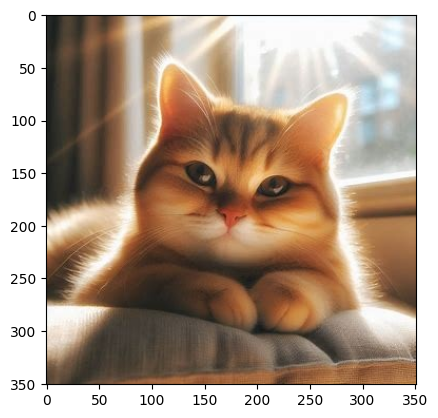

Image 1: Predicted class: Dog, Actual class: Cat, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


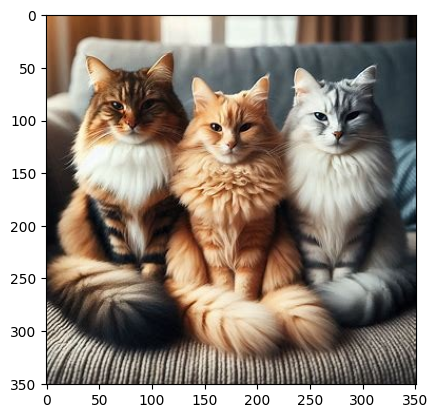

Image 2: Predicted class: Dog, Actual class: Cat, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


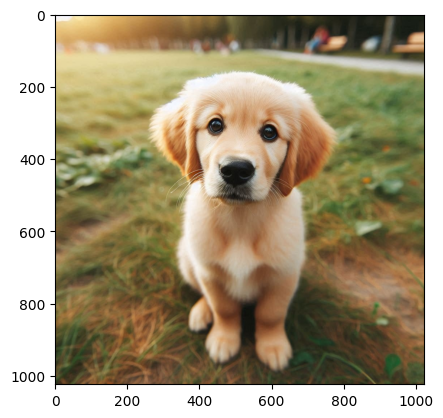

Image 3: Predicted class: Dog, Actual class: Dog, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


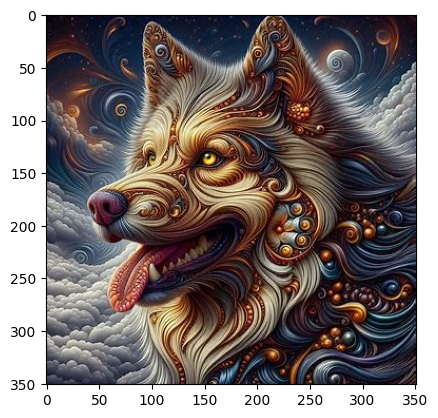

Image 4: Predicted class: Dog, Actual class: Dog, Correct: True


In [42]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = mlp_model.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Dog' if predicted_class == 1 else 'Cat'
    actual_class_name = 'Dog' if actual_label == 1 else 'Cat'
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

VGG - 1 block

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


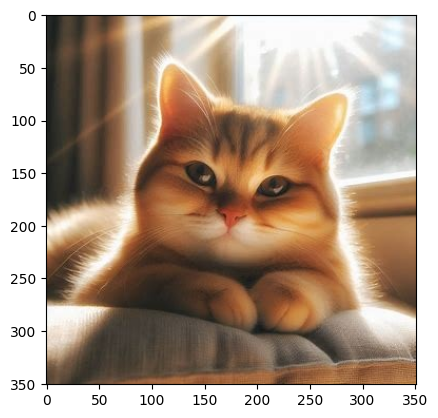

Image 1: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


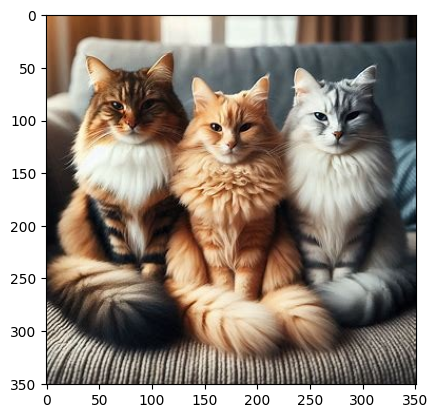

Image 2: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


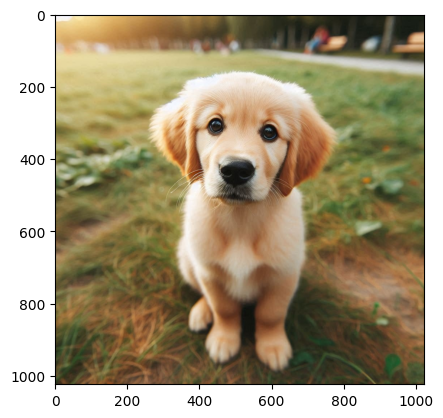

Image 3: Predicted class: Cat, Actual class: Dog, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


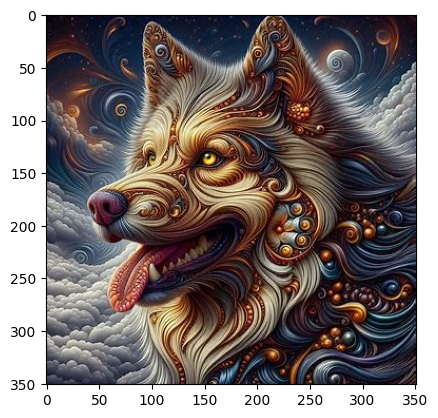

Image 4: Predicted class: Cat, Actual class: Dog, Correct: False


In [43]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_1.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Dog' if predicted_class == 1 else 'Cat'
    actual_class_name = 'Dog' if actual_label == 1 else 'Cat'
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

VGG - 3 blocks

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


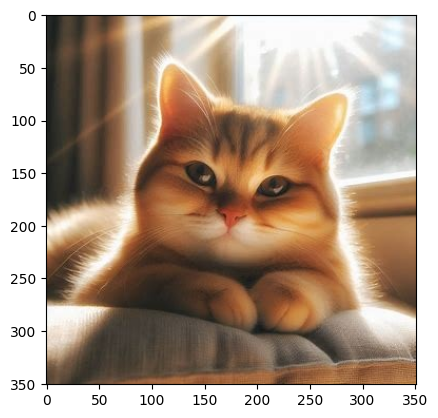

Image 1: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


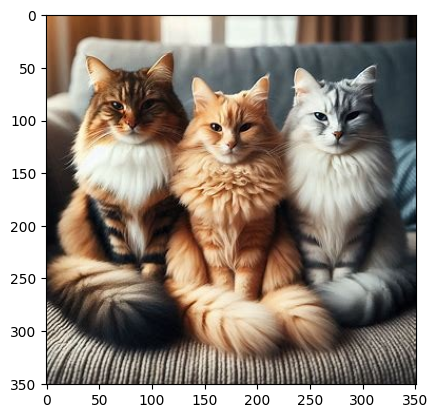

Image 2: Predicted class: Dog, Actual class: Cat, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


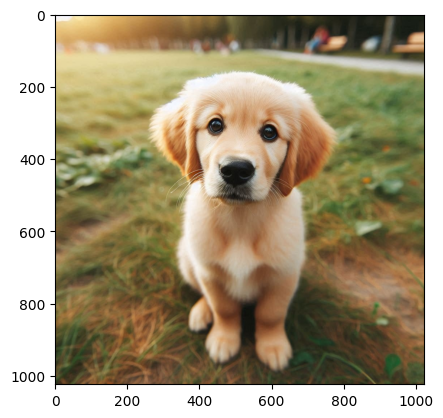

Image 3: Predicted class: Dog, Actual class: Dog, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


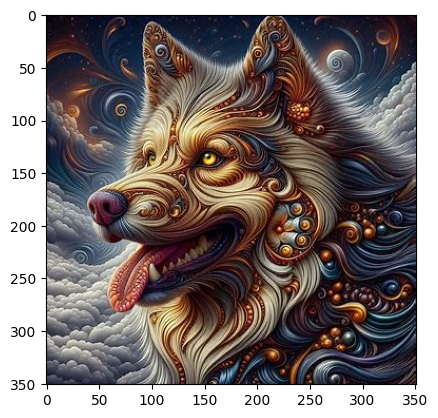

Image 4: Predicted class: Cat, Actual class: Dog, Correct: False


In [44]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_2.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Dog' if predicted_class == 1 else 'Cat'
    actual_class_name = 'Dog' if actual_label == 1 else 'Cat'
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

VGG - 3 blocks with data augmentation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


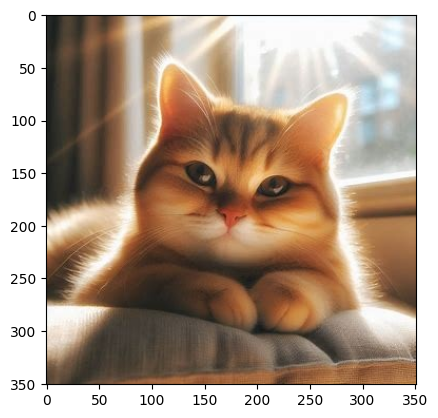

Image 1: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


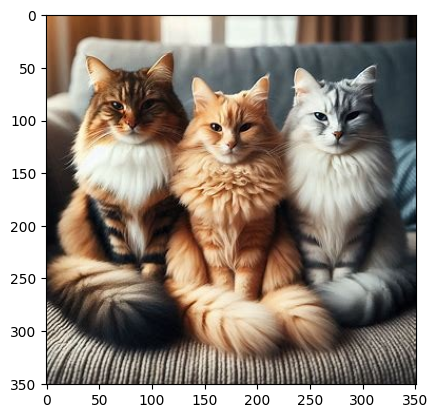

Image 2: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


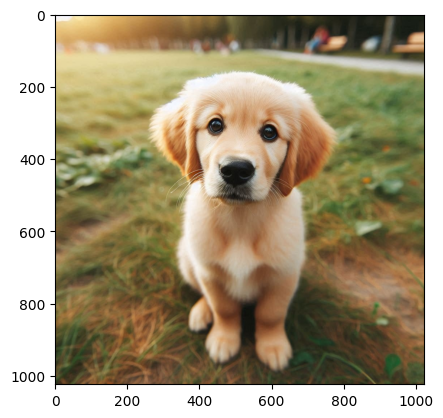

Image 3: Predicted class: Dog, Actual class: Dog, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


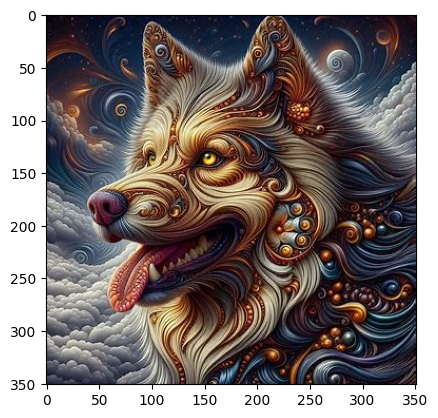

Image 4: Predicted class: Cat, Actual class: Dog, Correct: False


In [45]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_3.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Dog' if predicted_class == 1 else 'Cat'
    actual_class_name = 'Dog' if actual_label == 1 else 'Cat'
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

Transfer learning using VGG16 or VGG19 with tuning all layers

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


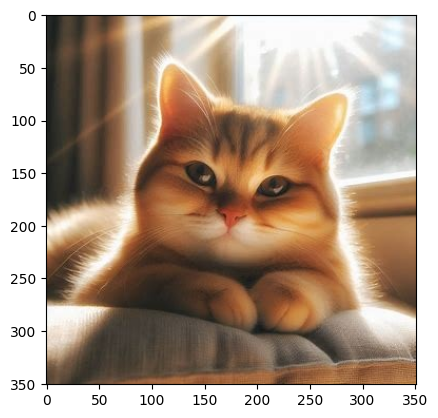

Image 1: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


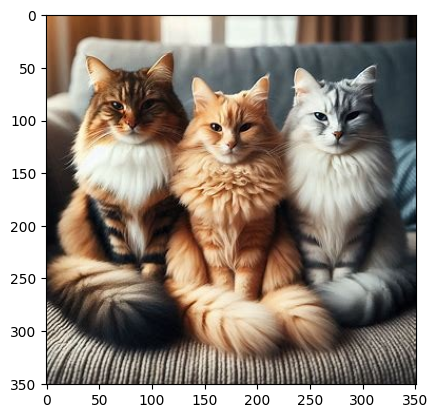

Image 2: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


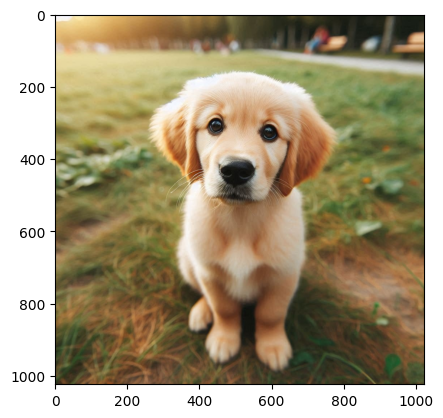

Image 3: Predicted class: Cat, Actual class: Dog, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


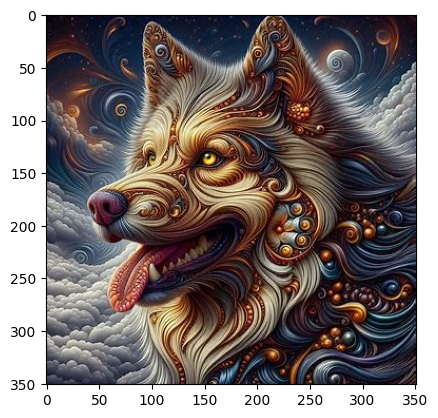

Image 4: Predicted class: Cat, Actual class: Dog, Correct: False


In [46]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_4.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Dog' if predicted_class == 1 else 'Cat'
    actual_class_name = 'Dog' if actual_label == 1 else 'Cat'
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

Transfer learning using VGG16 or VGG19 with tuning only final MLP layers

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


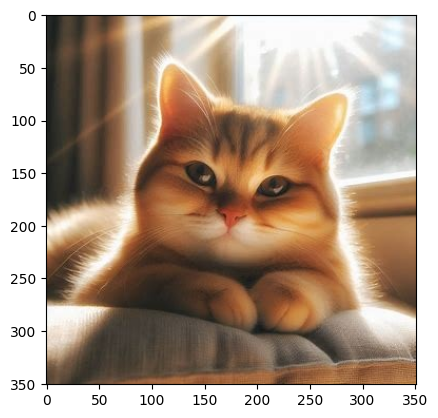

Image 1: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


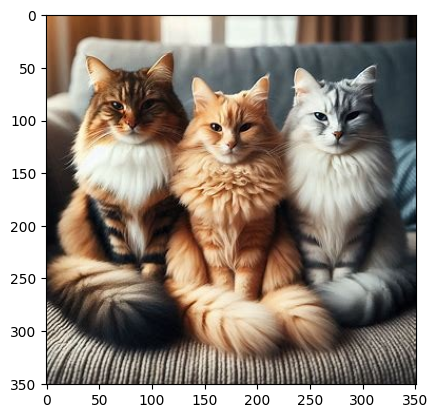

Image 2: Predicted class: Cat, Actual class: Cat, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


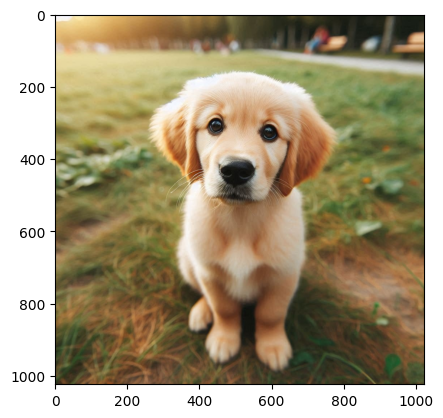

Image 3: Predicted class: Dog, Actual class: Dog, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


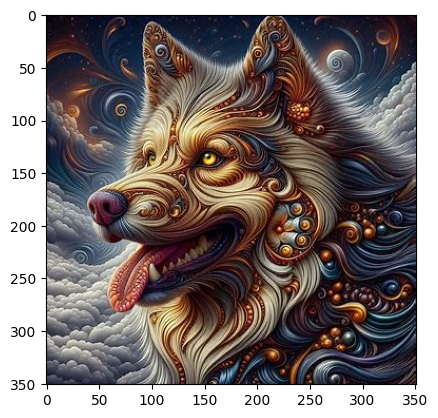

Image 4: Predicted class: Cat, Actual class: Dog, Correct: False


In [47]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_5.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Dog' if predicted_class == 1 else 'Cat'
    actual_class_name = 'Dog' if actual_label == 1 else 'Cat'
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")